In [1]:
# Dependencies
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Declare the database
db = client.ClimateData

In [3]:
# query the classroom collection for Indianapolis Ozone readings
indy_ozone_us_epa_data = db.US_EPA.find({"State Name":"Indiana","Parameter Name":"Ozone","City Name":"Indianapolis"})


In [4]:
# Check out the data
for indy_ozone_data in indy_ozone_us_epa_data:
    print(indy_ozone_data)

{'_id': ObjectId('5fcd4f04ae4c3c6ba6ab52ef'), 'Parameter Name': 'Ozone', 'Year': 1995, 'Sample Duration': '1 HOUR', 'Pollutant Standard': 'Ozone 1-hour 1979', 'Metric Used': 'Daily maxima of observed hourly values (between 9:00 AM and 8:00 PM)', 'Method Name': 'INSTRUMENTAL - ULTRA VIOLET', 'Units of Measure': 'Parts per million', 'Max Value': 0.10400000000000001, 'Max DateTime': '1995-07-14 16:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcd4f04ae4c3c6ba6ab52f0'), 'Parameter Name': 'Ozone', 'Year': 1995, 'Sample Duration': '8-HR RUN AVG BEGIN HOUR', 'Pollutant Standard': 'Ozone 8-Hour 1997', 'Metric Used': 'Daily maximum of 8 hour running average of observed hourly values', 'Method Name': nan, 'Units of Measure': 'Parts per million', 'Max Value': 0.095, 'Max DateTime': '1995-07-14 11:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcd4f04ae4c3c6ba6ab52f1'), 'Parameter Name'

{'_id': ObjectId('5fcd4f63f4aea9d8589f018a'), 'Parameter Name': 'Ozone', 'Year': 2002, 'Sample Duration': '8-HR RUN AVG BEGIN HOUR', 'Pollutant Standard': 'Ozone 8-Hour 1997', 'Metric Used': 'Daily maximum of 8 hour running average of observed hourly values', 'Method Name': nan, 'Units of Measure': 'Parts per million', 'Max Value': 0.102, 'Max DateTime': '2002-06-21 10:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcd4f63f4aea9d8589f018b'), 'Parameter Name': 'Ozone', 'Year': 2002, 'Sample Duration': '8-HR RUN AVG BEGIN HOUR', 'Pollutant Standard': 'Ozone 8-Hour 2008', 'Metric Used': 'Daily maximum of 8 hour running average of observed hourly values', 'Method Name': nan, 'Units of Measure': 'Parts per million', 'Max Value': 0.102, 'Max DateTime': '2002-06-21 10:00', 'State Name': 'Indiana', 'County Name': 'Marion', 'City Name': 'Indianapolis'}
{'_id': ObjectId('5fcd4f63f4aea9d8589f018c'), 'Parameter Name': 'Ozone', 'Year': 2002, '

In [5]:
# Put the query data into a DataFrame
indy_ozone_df = pd.DataFrame(list(db.US_EPA.find({"State Name":"Indiana","Parameter Name":"Ozone","City Name":"Indianapolis"})))
indy_ozone_df.head()

,_id,Parameter Name,Year,Sample Duration,Pollutant Standard,Metric Used,Method Name,Units of Measure,Max Value,Max DateTime,State Name,County Name,City Name
0,5fcd4f04ae4c3c6ba6ab52ef,Ozone,1995,1 HOUR,Ozone 1-hour 1979,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET,Parts per million,0.104,1995-07-14 16:00,Indiana,Marion,Indianapolis
1,5fcd4f04ae4c3c6ba6ab52f0,Ozone,1995,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,Daily maximum of 8 hour running average of obs...,NaN,Parts per million,0.095,1995-07-14 11:00,Indiana,Marion,Indianapolis
2,5fcd4f04ae4c3c6ba6ab52f1,Ozone,1995,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,Daily maximum of 8 hour running average of obs...,NaN,Parts per million,0.095,1995-07-14 11:00,Indiana,Marion,Indianapolis
3,5fcd4f04ae4c3c6ba6ab52f2,Ozone,1995,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,Daily maximum of 8-hour running average,NaN,Parts per million,0.095,1995-07-14 11:00,Indiana,Marion,Indianapolis
4,5fcd4f04ae4c3c6ba6abfcbb,Ozone,1996,1 HOUR,Ozone 1-hour 1979,Daily maxima of observed hourly values (betwee...,INSTRUMENTAL - ULTRA VIOLET,Parts per million,0.109,1996-06-27 14:00,Indiana,Marion,Indianapolis


In [6]:
# Extract the columns we need for our chart
chart_indy_ozone_df = indy_ozone_df[['Max Value','Year']]
chart_indy_ozone_df.head()

,Max Value,Year
0,0.104,1995
1,0.095,1995
2,0.095,1995
3,0.095,1995
4,0.109,1996


In [7]:
# Find out how much data we have
len(chart_indy_ozone_df)

416

In [8]:
# Average all of the data for a year
avg_chart_indy_ozone_df = chart_indy_ozone_df.groupby(['Year']).agg({'Max Value':['mean']}).reset_index()
avg_chart_indy_ozone_df.columns = ['Year','Average_Value']

# Output some of the data
avg_chart_indy_ozone_df.head()

,Year,Average_Value
0,1995,0.094438
1,1996,0.097563
2,1997,0.088125
3,1998,0.096500
4,1999,0.094875


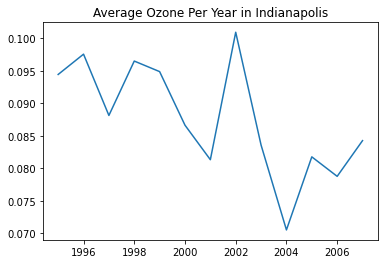

In [10]:
# Chart the result
plt.plot(avg_chart_indy_ozone_df['Year'], avg_chart_indy_ozone_df['Average_Value'])
plt.title('Average Ozone Per Year in Indianapolis')

# Save a copy of the chart
plt.savefig('Images/Indy_Ozone.png')

plt.show()